## Import scientific Python packages

```matplotlib``` will help us make plots. ```pandas``` will help us import and manipulate data. ```numpy``` will help us make calculations.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import slope data

In [18]:
slope_profile = pd.read_csv('./data/Team_Moraine_slope_survey.csv')

Adjust the elevation of the topographic profile to match the true elevation of the benchmark.

In [19]:
slope_profile['EL (m)'] = slope_profile['EL (m)'] + 2289

## Plot slope data

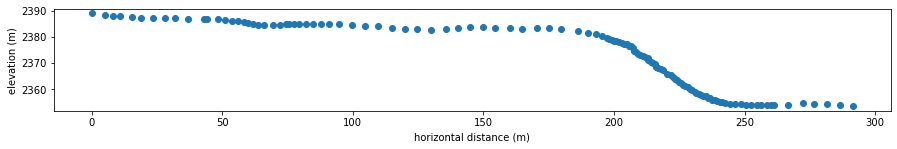

In [20]:
plt.figure(figsize=(15,15))
plt.scatter(slope_profile['L_x (m)'], slope_profile['EL (m)'])
plt.xlabel('horizontal distance (m)')
plt.ylabel('elevation (m)')
plt.axis('scaled')
plt.show()

## Analyzing fault offset

To consider fault offset, we need to deal with the reality that there is a background slope both in the valley and on the moraine crest. Divide the slope profile in the the portion above the scarp and below the scarp:

In [23]:
slope_profile_upper = slope_profile[slope_profile['L_x (m)']<190]
slope_profile_fault = slope_profile[(slope_profile['L_x (m)']>206) & (slope_profile['L_x (m)']<228)]
slope_profile_lower = slope_profile[slope_profile['L_x (m)']>245]

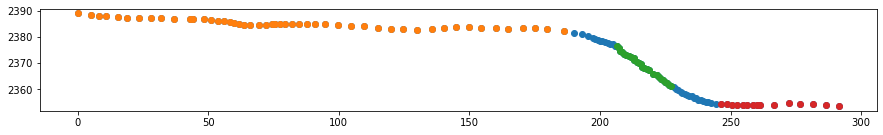

In [24]:
plt.figure(figsize=(15,15))
plt.scatter(slope_profile['L_x (m)'], slope_profile['EL (m)'])
plt.scatter(slope_profile_upper['L_x (m)'], slope_profile_upper['EL (m)'])
plt.scatter(slope_profile_fault['L_x (m)'], slope_profile_fault['EL (m)'])
plt.scatter(slope_profile_lower['L_x (m)'], slope_profile_lower['EL (m)'])
plt.axis('scaled')
plt.show()

## Fit linear regressions to the slope above and below the fault

In [8]:
upper_slope, upper_intercept = np.polyfit(slope_profile_upper['L_x (m)'], slope_profile_upper['EL (m)'],1)

lower_slope, lower_intercept = np.polyfit(slope_profile_lower['L_x (m)'], slope_profile_lower['EL (m)'],1)

In [9]:
fault_midpoint = 218

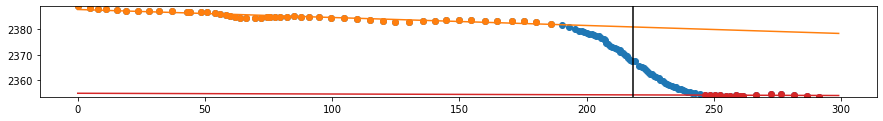

In [10]:
x = np.arange(0, 300, 1)

plt.figure(figsize=(15,15))
plt.scatter(slope_profile['L_x (m)'], slope_profile['EL (m)'])

plt.scatter(slope_profile_upper['L_x (m)'], slope_profile_upper['EL (m)'],color='C1')
plt.plot(x, upper_slope*x + upper_intercept,color='C1')

plt.scatter(slope_profile_lower['L_x (m)'], slope_profile_lower['EL (m)'],color='C3')
plt.plot(x, lower_slope*x + lower_intercept,color='C3')

plt.vlines(fault_midpoint,0,3000,color='black')

plt.axis('scaled')
plt.ylim(np.min(slope_profile['EL (m)']),np.max(slope_profile['EL (m)']))
plt.show()

## Calculate the vertical offset between the upper and lower lines at the fault

We can calculate the value on each fit line at the midpoint of the fault.

In [25]:
foot_wall_z = upper_slope*fault_midpoint + upper_intercept
print('footwall wall elevation at ' + str(fault_midpoint) + ' m along profile: ' + str(round(foot_wall_z,1)))
hanging_wall_z = lower_slope*fault_midpoint + lower_intercept
print('hanging wall elevation at ' + str(fault_midpoint) + ' m along profile: ' + str(round(hanging_wall_z,1)))
difference = foot_wall_z-hanging_wall_z
print('fault drop in elevation is ' + str(round(difference,1)) + ' m')

footwall wall elevation at 218 m along profile: 2381.0
hanging wall elevation at 218 m along profile: 2354.2
fault drop in elevation is 26.7 m


## Fit linear regressions to the fault slope

In [26]:
fault_slope, fault_intercept = np.polyfit(slope_profile_fault['L_x (m)'], slope_profile_fault['EL (m)'],1)

We can calculate the angle of the slope from this fit:

In [13]:
slope_angle = np.rad2deg(np.arctan(fault_slope/1))
print(round(slope_angle,1))

-35.4


We can determine the intersects of the fault scarp slope with the upper and lower slopes:

In [27]:
x_upper_intersect = (fault_intercept - upper_intercept) / (upper_slope - fault_slope)
y_upper_intersect = fault_slope * x_upper_intersect + fault_intercept

x_lower_intersect = (lower_intercept- fault_intercept) / (fault_slope - lower_slope)
y_lower_intersect = fault_slope * x_lower_intersect + fault_intercept

These intercepts are plotted as black squares below:

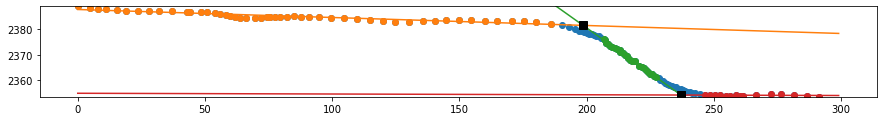

In [28]:
x = np.arange(0, 300, 1)

plt.figure(figsize=(15,15))
plt.scatter(slope_profile['L_x (m)'], slope_profile['EL (m)'])

plt.scatter(slope_profile_upper['L_x (m)'], slope_profile_upper['EL (m)'],color='C1')
plt.plot(x, upper_slope*x + upper_intercept,color='C1')

plt.scatter(slope_profile_fault['L_x (m)'], slope_profile_fault['EL (m)'],color='C2')
plt.plot(x, fault_slope*x + fault_intercept,color='C2')

plt.scatter(slope_profile_lower['L_x (m)'], slope_profile_lower['EL (m)'],color='C3')
plt.plot(x, lower_slope*x + lower_intercept,color='C3')

plt.plot(x_upper_intersect,y_upper_intersect,color='black',marker='s',markersize=8)
plt.plot(x_lower_intersect,y_lower_intersect,color='black',marker='s',markersize=8)

plt.axis('scaled')
plt.ylim(np.min(slope_profile['EL (m)']),np.max(slope_profile['EL (m)']))
plt.show()

If the current surface of the slope is the fault plane we can calculate the offset along the plane (once again pythagorean theorem comes in handy!)

In [29]:
x = x_lower_intersect - x_upper_intersect
y = y_upper_intersect - y_lower_intersect
h = np.sqrt(x**2 + y**2)
h

47.225956087560796

## Determining the orientation of the fault plane

However, there have been ongoing hillslope processes eroding the scarp as it progressively develops through earthquakes. To determine how much slip there has been on the fault, we need to know the angle of the fault plane. One way that we can get at this information is not through the slope on the fault scarp, but rather the intersection of the fault with the landscape. In EPS 101, you took measured bedding plane measurements and plotted their intersection with the 

##  offset along the fault